### Investigate max durations outliers in item and student attempt times
The duration between student start and stop times have large number of outliers of over 100 minutes

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf = load_df('filterDf')
types = get_var_types()

#### Create dataframe with durations

###### Count before

In [3]:
filterDf.count()

80548

- 80,548

In [4]:
durDf = add_attempt_duration(filterDf)

###### Count after

In [5]:
durDf.count()

80548

- 80,548

###### Remove stop dates before start dates to focus on max

In [7]:
durDf = remove_stop_dates_before_start_dates(durDf)

65541

###### Count

In [81]:
durDf.count()

65541

###### Duration statistics

In [23]:
durDf.select(
        'item_attempt_duration_mins',
        'student_duration_mins'
    ).toPandas().describe()

,item_attempt_duration_mins,student_duration_mins
count,64819.000000,64382.000000
mean,535.445908,1334.040336
std,3430.142219,6308.348684
min,0.000000,0.000000
25%,0.433333,11.400000
50%,1.850000,27.916667
75%,9.716667,271.566667
max,109353.100000,261008.166667


- Outliers on min and max

###### Correlation of high and low durations and zero score

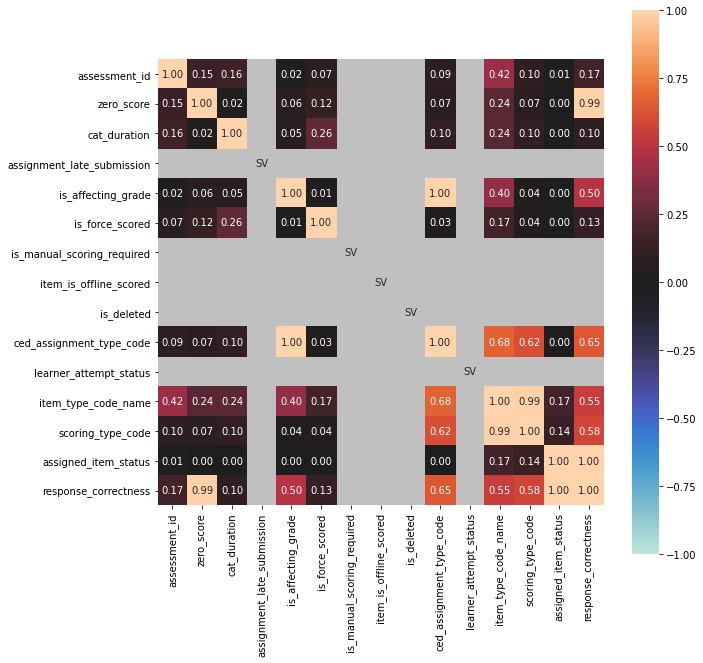

In [24]:
durDf = get_random_sample(durDf).withColumn(
    'cat_duration',
    F.when( F.col('student_duration_mins') > 100, 'High').otherwise('Low')
).withColumn(
    'zero_score',
    F.when( F.col('raw_score') == 0, 'Yes').otherwise('No')
)

corr, ax = associations( durDf.select('assessment_id', 'zero_score', 'cat_duration', *types['binaryVars'], *types['nominalVars']).toPandas(), nan_replace_value='null', figsize=[10,10] )

- No correlation to cat_duration

###### Preview an assessment with outliers

In [38]:
pdDf = get_random_sample(durDf).filter(F.col('student_duration_mins') > 5000).limit(5).toPandas()
pdDf

,ced_assignment_type_code,is_affecting_grade,number_of_learners,number_of_distinct_instance_items,assignment_max_attempts,assignment_late_submission,assignment_final_submission_date,assignment_start_date,assignment_due_date,min_student_start_datetime,...,assessment_instance_id,learner_assignment_attempt_id,assessment_instance_attempt_id,learner_id,learner_assigned_item_attempt_id,assessment_item_response_id,item_attempt_duration_mins,student_duration_mins,cat_duration,zero_score
0,assessment,True,25,16,1,False,2019-11-23 04:59:00,2019-11-05 05:00:00,2019-11-23 04:59:00,2019-11-07 16:58:07.752,...,587176,737176,820492,985418,1111458,1323471,5.366667,10033.133333,High,Yes
1,assessment,True,25,16,1,False,2019-11-23 04:59:00,2019-11-05 05:00:00,2019-11-23 04:59:00,2019-11-07 16:58:07.752,...,587176,737176,820492,985418,1111466,1237973,1.516667,10033.133333,High,No
2,assessment,True,27,26,1,False,2020-03-07 04:59:00,2020-02-18 13:00:00,2020-03-07 04:59:00,2020-02-20 13:10:12.807,...,553685,703188,874122,968745,1118598,1291837,24.400000,7196.233333,High,No
3,assessment,True,19,30,1,False,2020-03-06 16:17:00,2020-02-25 14:00:00,2020-03-06 16:17:00,2020-02-25 14:50:04.200,...,525739,675250,770557,972133,1123525,1331568,6911.483333,18514.850000,High,No
4,assessment,True,25,21,1,False,2019-11-09 05:59:00,2019-10-29 05:00:00,2019-11-09 05:59:00,2019-10-31 19:23:20.802,...,469908,619511,805465,1007205,1123866,1267834,5817.366667,5856.050000,High,No


In [42]:
ids = pdDf['assessment_instance_attempt_id'][3]
ids

770557

+------------------------+------------------+------------------+---------------------------------+-----------------------+--------------------------+--------------------------------+---------------------+-------------------+--------------------------+--------------------------+-------------------------+--------------------------+-----------------------------+--------------------------+---------------+--------------------------+--------------------------+--------------------------+----------------------+----------------------+--------------------------+----------------------+----------------------+-------------------+-----------------+---------+--------------------+-------------------------------+-----------------------------+--------------------+----------+------+----------+-------------+----------------------+-----------------------------+------------------------------+----------+--------------------------------+---------------------------+
|ced_assignment_type_code|is_affecting_grade

In [46]:
filterDf.filter( F.col('assessment_instance_attempt_id') == 770557).show(50, False)


+------------------------+------------------+------------------+---------------------------------+-----------------------+--------------------------+--------------------------------+---------------------+-------------------+--------------------------+-------------------------+-------------------------+-------------------------+-----------------------------+------------------------+---------------+--------------------------+-----------------------+----------------------+----------------------+----------------------+--------------------------+----------------------+-------------------+-------------------+-----------------+---------+--------------------+-------------------------------+-----------------------------+--------------------+----------+------+----------+-------------+----------------------+-----------------------------+------------------------------+----------+--------------------------------+---------------------------+
|ced_assignment_type_code|is_affecting_grade|number_of_lea

In [86]:
attDf = filterDf.filter( F.col('assessment_instance_attempt_id') == 770557)

In [87]:
attDf.filter(
       ( F.col('item_attempt_start_datetime_utc') <= F.col('item_attempt_end_datetime_utc') )
   ).show(100, False)

+------------------------+------------------+------------------+---------------------------------+-----------------------+--------------------------+--------------------------------+---------------------+-------------------+--------------------------+-------------------------+-------------------------+-------------------------+-----------------------------+------------------------+---------------+--------------------------+-----------------------+----------------------+----------------------+----------------------+--------------------------+----------------------+-------------------+-------------------+-----------------+---------+--------------------+-------------------------------+-----------------------------+--------------------+----------+------+----------+-------------+----------------------+-----------------------------+------------------------------+----------+--------------------------------+---------------------------+
|ced_assignment_type_code|is_affecting_grade|number_of_lea

In [88]:
remove_stop_dates_before_start_dates(filterDf).filter( F.col('assessment_instance_attempt_id') == 770557).show(50, False)

+------------------------+------------------+------------------+---------------------------------+-----------------------+--------------------------+--------------------------------+---------------------+-------------------+--------------------------+-------------------------+-------------------------+-------------------------+-----------------------------+------------------------+---------------+--------------------------+-----------------------+----------------------+----------------------+----------------------+--------------------------+----------------------+-------------------+-------------------+-----------------+---------+--------------------+-------------------------------+-----------------------------+--------------------+----------+------+----------+-------------+----------------------+-----------------------------+------------------------------+----------+--------------------------------+---------------------------+
|ced_assignment_type_code|is_affecting_grade|number_of_lea

In [51]:
durDf.filter( F.col('assessment_instance_attempt_id') == 770557).show(50, False)

+------------------------+------------------+------------------+---------------------------------+-----------------------+--------------------------+--------------------------------+---------------------+-------------------+--------------------------+-------------------------+-------------------------+-------------------------+-----------------------------+------------------------+---------------+--------------------------+-----------------------+----------------------+----------------------+----------------------+--------------------------+----------------------+-------------------+-------------------+-----------------+---------+--------------------+-------------------------------+-----------------------------+--------------------+----------+------+----------+-------------+----------------------+-----------------------------+------------------------------+----------+--------------------------------+---------------------------+--------------------------+---------------------+----------

In [ ]:
finish_todo('Investigate max durations outliers in item and student attempt times')
